# **Prodigy Infotech - Machine Learning Internship**
### **TASK 3 - House Price Prediction using LR**


### Author : Muhammad Awais Akhter

[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/awais-akhter)

### Problem Statement: Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

#### Dataset link :- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [ ]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Training Data

In [ ]:
house_df = pd.read_csv("PRODIGY_ML_01/train.csv")
house_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Testing Data

In [ ]:
test_data = pd.read_csv("PRODIGY_ML_01/test.csv")
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### Description of the dataset

In [ ]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Setting the Id column as the index
house_df = house_df.set_index("Id")
test_data = test_data.set_index("Id")
house_df.shape , test_data.shape

((1460, 80), (1459, 79))

The training data contains 80 features and 1460 records.

The testing data contains 79 features and 1459 records.

The one extra feature in the training data is the "SalePrice" column which contains the house price we are trying to predict.

## Handling Missing Data

In [ ]:
missing_list = house_df.isna().sum().sort_values(ascending = False).head(n = 50)
missing_list

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
MSSubClass          0
Fireplaces          0
Functional          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
CentralAir

This data has a lot of missing data that has to be handled.

In [ ]:
# Fraction of data missing in each column
percentage_missing = missing_list/house_df.shape[0]
percentage_missing

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
MasVnrType       0.597260
FireplaceQu      0.472603
LotFrontage      0.177397
GarageYrBlt      0.055479
GarageCond       0.055479
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtCond         0.025342
BsmtQual         0.025342
BsmtFinType1     0.025342
MasVnrArea       0.005479
Electrical       0.000685
MSSubClass       0.000000
Fireplaces       0.000000
Functional       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
GrLivArea        0.000000
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea    

In [ ]:
# Setting a thresold to drop some selected features which have many missing values
cols_to_drop = percentage_missing[percentage_missing > 0.45].keys()
cols_to_drop

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], dtype='object')

In [ ]:
house_df.drop(cols_to_drop, axis = 1, inplace=True)
test_data.drop(cols_to_drop, axis = 1, inplace=True)


In [ ]:
house_df.isna().sum().sort_values(ascending = False)

LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
MSZoning          0
SalePrice         0
Length: 74, dtype: int64

The remaining missing values will be imputed using SimpleImputer of scikit-learn.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
mean_imputer = SimpleImputer(missing_values= np.nan , strategy= 'mean') # Uses mean to impute
most_frequent_imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent') # Uses mode to impute
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median') # Uses median to impute

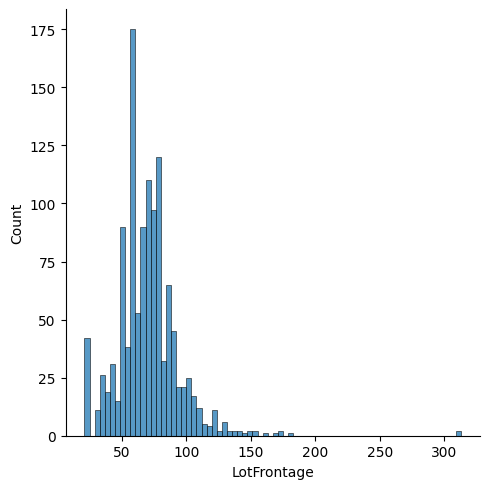

In [ ]:
sns.displot(data = house_df, x = "LotFrontage")
plt.show()

The LotFrontage Feature seems to be almost normally distributed so we can use the mean imputer to impute it's missing values.

In [ ]:
house_df["LotFrontage"]=mean_imputer.fit_transform(house_df[["LotFrontage"]])
test_data["LotFrontage"]=mean_imputer.fit_transform(test_data[["LotFrontage"]])

In [ ]:
house_df.isna().sum().sort_values(ascending = False).head(n=30)

GarageType       81
GarageCond       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
Electrical        1
WoodDeckSF        0
PavedDrive        0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
SaleCondition     0
BedroomAbvGr      0
SaleType          0
YrSold            0
MoSold            0
MiscVal           0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
PoolArea          0
dtype: int64

There are many categorical values to be imputed. We will use the mode stategy for them.

In [ ]:
categorical_missing = ["GarageCond", "GarageFinish", "GarageQual","GarageType",
"BsmtExposure","BsmtCond","BsmtQual","BsmtFinType2","BsmtFinType1"]

In [ ]:
house_df[categorical_missing] = most_frequent_imputer.fit_transform(house_df[categorical_missing])
test_data[categorical_missing] = most_frequent_imputer.fit_transform(test_data[categorical_missing])

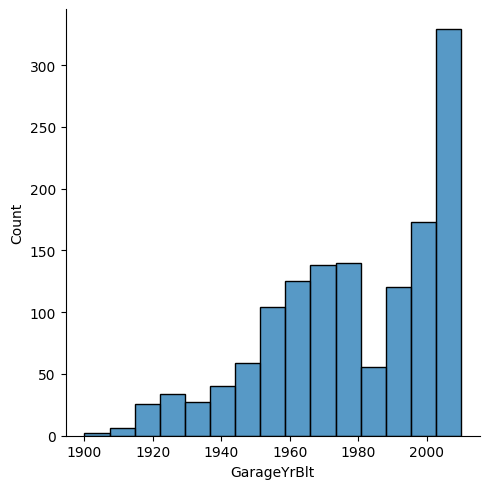

In [ ]:
sns.displot(data = house_df, x="GarageYrBlt")
plt.show()

Finally, the GarageYrBit feature is skewed to the right. So, we use meadin to impute it's missing values.

In [ ]:
house_df["GarageYrBlt"] = median_imputer.fit_transform(house_df[["GarageYrBlt"]])
test_data["GarageYrBlt"] = median_imputer.fit_transform(test_data[["GarageYrBlt"]])

In [ ]:
house_df.isna().sum().sort_values(ascending = False).head(n=30)

MasVnrArea       8
Electrical       1
GarageYrBlt      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageType       0
MSSubClass       0
CentralAir       0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
dtype: int64

Now, not much data is missing. So, we can just remove these missing entries.

In [ ]:
house_df.dropna(inplace = True)
test_data.dropna(inplace = True)

In [ ]:
print(house_df.isna().sum().sort_values(ascending = False))
print(house_df.shape)
print(test_data.shape)

MSSubClass      0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
ExterQual       0
MasVnrArea      0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 74, dtype: int64
(1451, 74)
(1432, 73)


#### All missing values have been handled!

In [ ]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Data Preprocessing



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
numerical_cols = house_df.select_dtypes(include = ['int64', 'float64']).columns.to_list()
numerical_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
categorical_cols = house_df.select_dtypes(include = ['object']).columns.to_list()
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
# Seperating features and values in the training data
X = house_df.drop('SalePrice', axis = 1)
y = house_df[['SalePrice']]
X,y

(      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
 Id                                                                            
 1             60       RL         65.0     8450   Pave      Reg         Lvl   
 2             20       RL         80.0     9600   Pave      Reg         Lvl   
 3             60       RL         68.0    11250   Pave      IR1         Lvl   
 4             70       RL         60.0     9550   Pave      IR1         Lvl   
 5             60       RL         84.0    14260   Pave      IR1         Lvl   
 ...          ...      ...          ...      ...    ...      ...         ...   
 1456          60       RL         62.0     7917   Pave      Reg         Lvl   
 1457          20       RL         85.0    13175   Pave      Reg         Lvl   
 1458          70       RL         66.0     9042   Pave      Reg         Lvl   
 1459          20       RL         68.0     9717   Pave      Reg         Lvl   
 1460          20       RL         75.0 

In [ ]:
X.shape , y.shape

((1451, 73), (1451, 1))

### Scaling the data using Standard Scaler

In [ ]:
std_sc = StandardScaler()

In [ ]:
def MyStandardScaler(df, col_names):
    features = df[col_names]
    std_sc.fit(features.values)
    features = std_sc.transform(features.values)
    df[col_names] = features
    return df

In [ ]:
numerical_features = numerical_cols.copy()
numerical_features.remove('SalePrice')
X = MyStandardScaler(X , numerical_features)
test_data = MyStandardScaler(test_data, numerical_features)
std_sc.fit(y[['SalePrice']])
y = std_sc.transform(y[['SalePrice']])
y = y.reshape(-1)
X,y

(      MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
 Id                                                                             
 1       0.072441       RL    -0.228363 -0.205996   Pave      Reg         Lvl   
 2      -0.872386       RL     0.452424 -0.090876   Pave      Reg         Lvl   
 3       0.072441       RL    -0.092205  0.074297   Pave      IR1         Lvl   
 4       0.308648       RL    -0.455291 -0.095881   Pave      IR1         Lvl   
 5       0.072441       RL     0.633967  0.375612   Pave      IR1         Lvl   
 ...          ...      ...          ...       ...    ...      ...         ...   
 1456    0.072441       RL    -0.364520 -0.259352   Pave      Reg         Lvl   
 1457   -0.872386       RL     0.679353  0.266998   Pave      Reg         Lvl   
 1458    0.308648       RL    -0.182977 -0.146734   Pave      Reg         Lvl   
 1459   -0.872386       RL    -0.092205 -0.079164   Pave      Reg         Lvl   
 1460   -0.872386       RL  

### Encoding the categorical data in numerical form using Label Encoder

In [ ]:
le = LabelEncoder()

In [ ]:
for column in categorical_cols:
    X[column]=le.fit_transform(X[column])
    test_data[column]=le.fit_transform(test_data[column])

In [ ]:
X.shape , test_data.shape

((1451, 73), (1432, 73))

### Splitting the data in training and testing sets

In [ ]:
X_train , X_test, y_train , y_test = train_test_split(X, y , test_size= 0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape , y_test.shape)
print(test_data.shape)

(1160, 73) (291, 73)
(1160,) (291,)
(1432, 73)


## Model Training

In [ ]:
%pip install xgboost
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Different models we will train
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
gb = GradientBoostingRegressor()
svr = SVR(C=100, gamma=1, kernel='linear')
kn = KNeighborsRegressor()
xg = xgb.XGBRegressor(random_state=42)

In [ ]:
models = {"Random Forest Regression":rf, "Decision Tree Regression":dt, "Gradient Boosting":gb, "Support Vector":svr, "K Neighbors":kn, "XG Boost":xg}

In [ ]:
model_scores = []
model_names = []
model_maes = []
model_r2scores = []

In [ ]:
for name , model in models.items():
    model.fit(X_train , y_train)
    pred = model.predict(X_test)
    model_names.append(name)
    model_scores.append(model.score(X_test, y_test))
    model_maes.append(mean_absolute_error(pred , y_test))
    model_r2scores.append(r2_score(pred, y_test))

In [ ]:
result_data = {
    'Model': model_names,
    'Score': model_scores,
    'MAE': model_maes,
    'R2': model_r2scores
    }

In [ ]:
result_df = pd.DataFrame(result_data)
result_df

,Model,Score,MAE,R2
0,Random Forest Regression,0.919790,0.183297,0.908577
1,Decision Tree Regression,0.794634,0.301592,0.825848
2,Gradient Boosting,0.922521,0.179744,0.922404
3,Support Vector,0.888482,0.217317,0.864105
4,K Neighbors,0.822878,0.273645,0.711965
5,XG Boost,0.904147,0.204815,0.902202


As we can see, the model which gave the best score is Gradient Boosting Regressor. So, we will use it to get the final predictions.

### Doing K Fold Cross Validation to get the model's cross validation score

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = gb

In [ ]:
X.shape, y.shape

((1451, 73), (1451,))

In [ ]:
mae_scores = []
mse_scores = []
r2_scores = []
for train_index, val_index in kfold.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mae_scores.append(mae)
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)
    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)

In [ ]:
average_mae = np.mean(mae_scores)
average_mse = np.mean(mse_scores)
average_r2 = np.mean(r2_scores)

In [ ]:
average_mae, average_mse, average_r2

(0.20516477211751782, 0.1512121640905344, 0.8459090569643098)

### Using the model to find Predictions

In [ ]:
predictions = model.predict(X_test)
predictions = std_sc.inverse_transform(predictions.reshape(-1,1)) # We have to undo the scaling we did to obtain the actual house prices that we have predicted.
predictions

array([[347339.72994692],
       [153032.33997374],
       [131600.57467638],
       [202504.09888003],
       [249490.27544341],
       [181460.49833174],
       [194954.94245906],
       [137022.41436634],
       [158835.7681064 ],
       [112861.54009248],
       [347112.589502  ],
       [120420.57577316],
       [225518.37908484],
       [143377.21494506],
       [185207.63533684],
       [197612.70306227],
       [206212.83894975],
       [211474.03007082],
       [186558.67528476],
       [335954.57559282],
       [160754.60793109],
       [307308.00585811],
       [137556.21436319],
       [351982.98275238],
       [ 81593.93720565],
       [236439.11075265],
       [180438.10440092],
       [177525.23718392],
       [165749.33927508],
       [122094.233878  ],
       [133601.87992331],
       [209823.66496116],
       [269301.31484227],
       [202887.51636068],
       [ 89202.29462518],
       [141055.41372577],
       [125829.12156911],
       [134028.71653505],
       [1535

### End of the code